## k-Means Clustering - Primer
  * **Introduction to K-means clustering**
  * **Evaluating the quality of clustering using Silhouette coefficient**
  * **Distance metrics and how to not misuse them**

### Background

Machine learning problems tend to be of three types: supervised, unsupervised, and reinforcement. Supervised learning problems involve building models that predict an outcome based on training data containing labels of outcomes. Reinforcement learning is a reasoning model involving an agent that learns and measures the impact of its actions on an interactive environment. Unsupervised learning aims to find any structure or patterns inherent to a dataset without using any outcome variables, labels or predictors.

A common unsupervised learning technique (and the focus of this notebook) is **K-means clustering**. It takes a single parameter, which is the number of clusters you want the underlying data to fall into, and attempts to find those clusters automatically as follows:
  1. Initially generate random cluster centers equal to the number of clusters
  2. For each sample (row), label it with the cluster center it is closest to by computing the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between it and each cluster center
  3. Generate new cluster centers for each cluster based on the labelings for each point.
  4. Repeat steps 2-3 until one of the following stopping criteria is met: 
    * small fraction of samples change labelings
    * cluster centers change position by a very small amount.

### Initial Set-up

The following libraries are to be imported and set-up. They include NumPy and Pandas for basic data exploration and extraction of descriptive statistics, seaborn for visualization, preprocessing tools for data normalization, and the k-means library and silhouette score for model evaluation.

In [1]:
#getting and working with data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np
from sklearn.metrics.cluster import silhouette_score

#visualizing results
%matplotlib inline
import seaborn as sns

### Analyzing the Iris Dataset with K-Means

k-means will be analyzed end evaluated on the **iris dataset**, which has been typically useful for clustering purposes.

There are 4 features identifying each type of iris:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
  
Datset [source](https://archive.ics.uci.edu/ml/datasets/Iris). 

Going forward, we are going to assume we don't know the kind of iris each sample corresponds to:

In [2]:
#we're getting the data directly off the internet here! how cool is that!
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",
                        names=["sepal_length","sepal_width","petal_length","petal_width","iris_type"])
iris_data_no_names = iris_data.drop("iris_type",axis=1)
print(iris_data_no_names.head())
iris_data_features = iris_data_no_names.columns

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Let's take a look at the dataset:

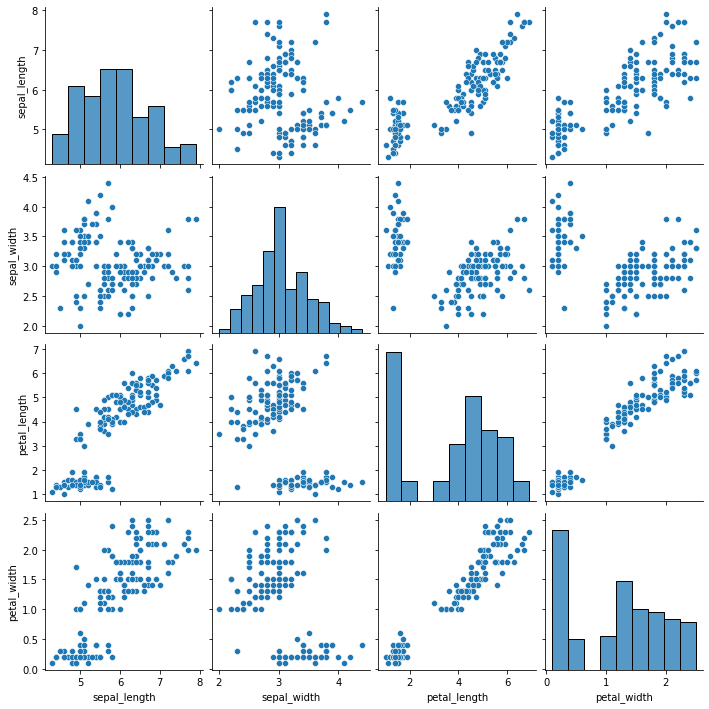

In [3]:
sns.pairplot(iris_data)

This dataset looks like it has some interesting structure! Let's see if we can't uncover and explore some of it.

At first pass, it looks like the dataset has at least 2 distinct clusters, right? So let's use k-means clustering to automatically find 2 clusters in the dataset:

In [4]:
kmeans = KMeans(n_clusters=2,random_state=1234)
kmeans.fit(iris_data_no_names[iris_data_features])

KMeans(n_clusters=2, random_state=1234)

In [5]:
kmeans.labels_   # Property of kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
kmeans_2         object
dtype: object


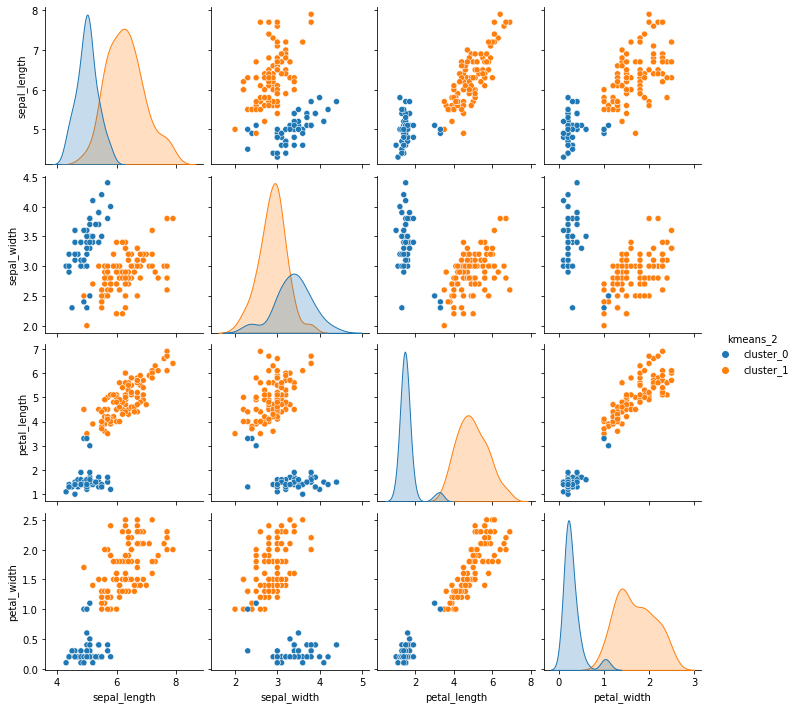

In [6]:
iris_data_no_names["kmeans_2"] = ["cluster_"+str(label) for label in kmeans.labels_]
print(iris_data_no_names.dtypes)
sns.pairplot(iris_data_no_names,hue="kmeans_2")

In [7]:
iris_data_no_names.head()

sepal_length  sepal_width  petal_length  petal_width   kmeans_2
0           5.1          3.5           1.4          0.2  cluster_0
1           4.9          3.0           1.4          0.2  cluster_0
2           4.7          3.2           1.3          0.2  cluster_0
3           4.6          3.1           1.5          0.2  cluster_0
4           5.0          3.6           1.4          0.2  cluster_0

In [8]:
print(iris_data_no_names.mean())
iris_data_no_names.std()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [9]:
print("Cluster centers found by k-means:\n",kmeans.cluster_centers_)

Cluster centers found by k-means:
 [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [10]:
iris_2_cluster_centers = iris_data_no_names.groupby("kmeans_2").mean()
print("Means of each column :\n",iris_2_cluster_centers.values)

Means of each column :
 [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [11]:
iris_2_cluster_centers

sepal_length  sepal_width  petal_length  petal_width
kmeans_2                                                       
cluster_0      5.005660     3.369811      1.560377     0.290566
cluster_1      6.301031     2.886598      4.958763     1.695876

Let's plot the cluster centers on one of the plots we found above:

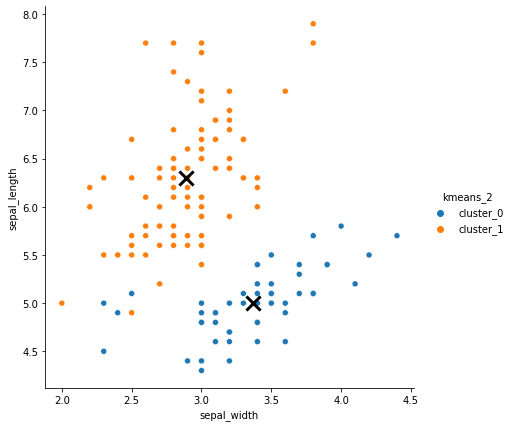

In [12]:
colors = np.array(['red', 'green'])

sns.pairplot(iris_data_no_names,x_vars="sepal_width",y_vars="sepal_length",hue="kmeans_2",height=6)
sns.mpl.pyplot.scatter(iris_2_cluster_centers.sepal_width, iris_2_cluster_centers.sepal_length, linewidths=3, marker='x', s=200, c='black')

## Impact of Feature Scaling on k-Means

**K-means** is the first algorithm we will use that **is affected by the scale of every feature**, by virtue of the fact that it uses a single distance metric (euclidean distance) across all features.

In practice, this means that for two features with very different scales of values one feature's contribution to the overall distance can dominate all distances found in the other feature:
  - Given 2 features and their original scales (difference between maximum and minimum values):
    - size in milliimeters
    - weight in kilograms
  - Distances in peoples sizes (which can vary 2 feet, about ~600mm) will dominate differences in peoples weight (which vary usually no more than ~50kg across people) because the relative scale is ~10x larger for sizes than kilograms.

What this means is that **for k-means clustering, features must be scaled to the same ranges of values to contribute "equally" to the euclidean distance calculation**.

This is done by converting each sample's original value to its z-scored value:

$z_i = \frac{x_i - \mu}{\sigma}$

Each row is transformed per-column by:
  - subtracting from the element in each row the mean for each feature (column) and then taking this value and
  - dividing by that feature's (column's) standard deviation.

Z-scoring our data allows us to compare values across columns.
Here's the two-line way of generating z-scores for our data:

In [13]:
# center and scale the data
scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data_no_names[iris_data_features])
iris_data_scaled = pd.DataFrame(iris_data_scaled,columns=iris_data_features)
print("Before scaling:\n", iris_data_no_names[iris_data_features].describe())
print("\nAfter scaling:\n", np.round(iris_data_scaled.describe(),2))

Before scaling:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

After scaling:
        sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean          -0.00        -0.00         -0.00        -0.00
std            1.00         1.00          1.00         1.00
min           -1.87        -2.43         -1.57        -1.45
25%           -0.90        -0.59         -1.23        -1.18
50%           -0.05        -0.13          0.34         0.13
75%   

In [14]:
# K-means on scaled data
km = KMeans(n_clusters=2,random_state=1234)
km.fit(iris_data_scaled)
iris_data_no_names['kmeans_2_scaled'] = [ "cluster_" + str(label) for label in km.labels_ ]
print(km.cluster_centers_)
iris_data_no_names.groupby('kmeans_2_scaled').mean()

[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]


sepal_length  sepal_width  petal_length  petal_width
kmeans_2_scaled                                                      
cluster_0               5.006        3.428         1.462        0.246
cluster_1               6.262        2.872         4.906        1.676

In [15]:
iris_data_scaled.head()

sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

In [16]:
iris_data_no_names.head()

sepal_length  sepal_width  petal_length  petal_width   kmeans_2  \
0           5.1          3.5           1.4          0.2  cluster_0   
1           4.9          3.0           1.4          0.2  cluster_0   
2           4.7          3.2           1.3          0.2  cluster_0   
3           4.6          3.1           1.5          0.2  cluster_0   
4           5.0          3.6           1.4          0.2  cluster_0   

  kmeans_2_scaled  
0       cluster_0  
1       cluster_0  
2       cluster_0  
3       cluster_0  
4       cluster_0

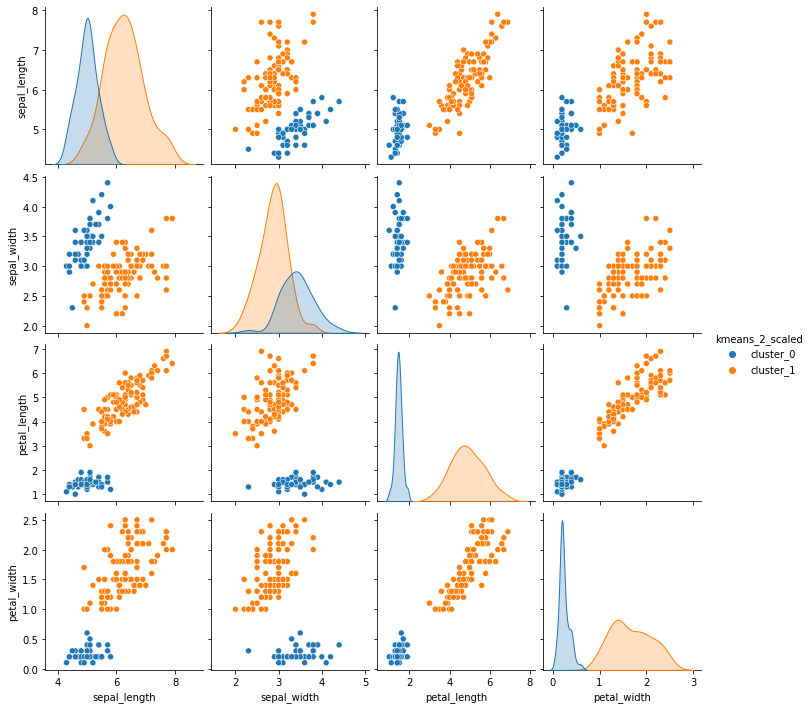

In [17]:
sns.pairplot(iris_data_no_names,hue="kmeans_2_scaled")

After scaling, the clusters appear much more clearly.

### Increasing the number of Clusters

In [18]:
km3 = KMeans(n_clusters=3,random_state=1234)
km3.fit(iris_data_scaled)
iris_data_no_names['kmeans_3_scaled'] = [ "cluster_" + str(label) for label in km3.labels_ ]
print(km3.cluster_centers_)
iris_data_no_names.groupby('kmeans_3_scaled').mean()

[[ 1.13140499  0.07903422  0.98537152  0.99908828]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.06881714 -0.89339955  0.34522179  0.28439302]]


sepal_length  sepal_width  petal_length  petal_width
kmeans_3_scaled                                                      
cluster_0            6.777083     3.091667      5.491667     1.958333
cluster_1            5.006000     3.428000      1.462000     0.246000
cluster_2            5.786538     2.669231      4.365385     1.415385

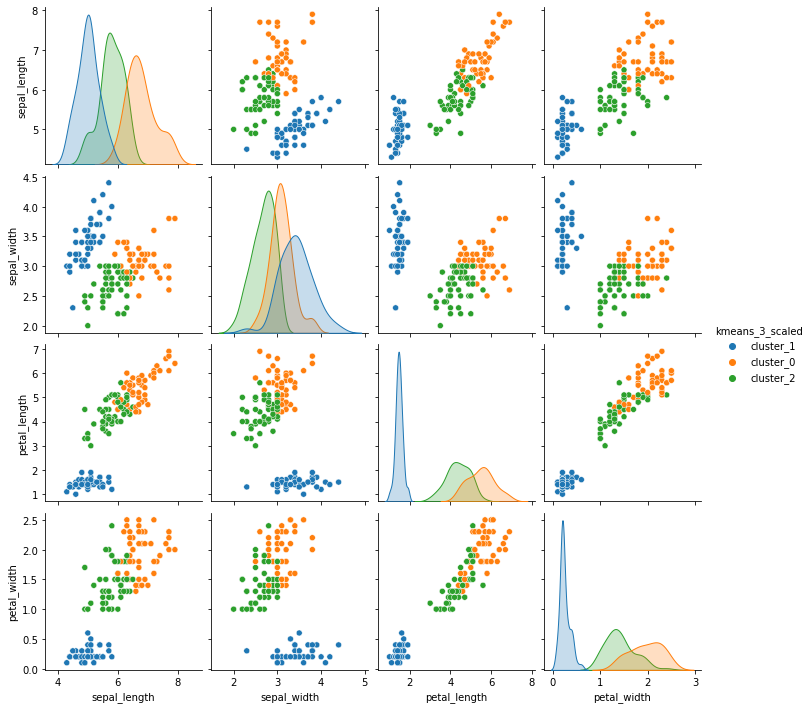

In [19]:
sns.pairplot(iris_data_no_names,hue="kmeans_3_scaled")

In [20]:
iris_data_no_names.kmeans_2_scaled.value_counts()

cluster_1    100
cluster_0     50
Name: kmeans_2_scaled, dtype: int64

In [21]:
iris_data_no_names.kmeans_3_scaled.value_counts()

cluster_2    52
cluster_1    50
cluster_0    48
Name: kmeans_3_scaled, dtype: int64

### Generate k-means clustering for 4 clusters.

[[ 1.13140499  0.07903422  0.98537152  0.99908828]
 [-0.74922133  1.43007001 -1.29759846 -1.22142131]
 [-0.06881714 -0.89339955  0.34522179  0.28439302]
 [-1.35230687  0.11914427 -1.31439133 -1.29749445]]
                 sepal_length  sepal_width  petal_length  petal_width
kmeans_4_scaled                                                      
cluster_0            6.777083     3.091667      5.491667     1.958333
cluster_1            5.225000     3.678571      1.475000     0.271429
cluster_2            5.786538     2.669231      4.365385     1.415385
cluster_3            4.727273     3.109091      1.445455     0.213636


C:\Users\gtmas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


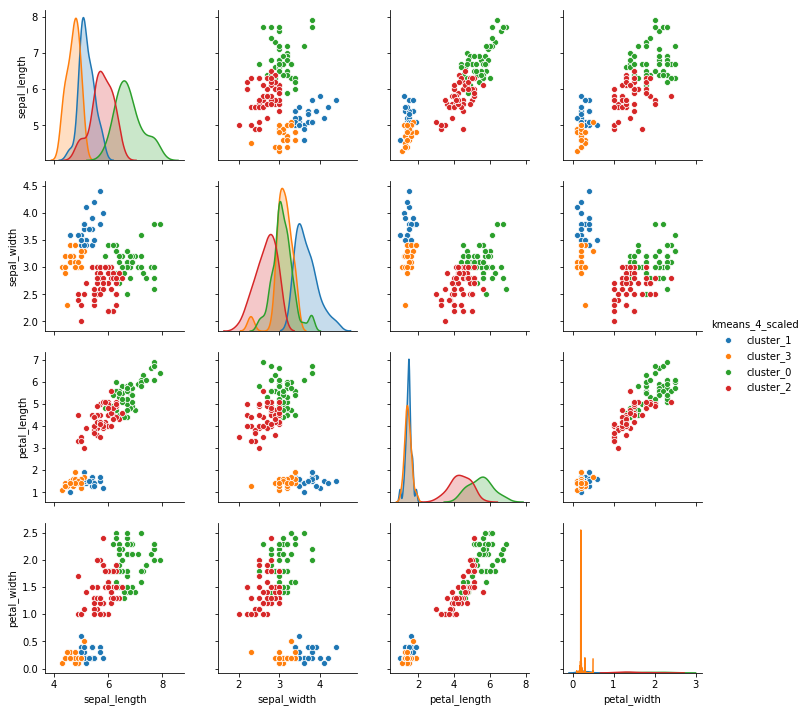

In [26]:
# 4 clusters
km4 = KMeans(n_clusters=4, random_state=1234)
km4.fit(iris_data_scaled)
iris_data_no_names['kmeans_4_scaled'] = [ "cluster_" + str(label) for label in km4.labels_ ]
print(km4.cluster_centers_)
print(iris_data_no_names.groupby('kmeans_4_scaled').mean())
sns.pairplot(iris_data_no_names, hue='kmeans_4_scaled')

### Using silhouette coefficient to evalualte quality of clustering

The [**Silhouette Coefficient**](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for each observation:

$$ SC=\frac {b−a}{max(a,b)}$$

a = mean distance to all other points in its cluster
b = mean distance to all other points in the next nearest cluster
It ranges from -1 (worst) to 1 (best). A global score is calculated by taking the mean score for all observations.

Let's calculate the silhouette coefficient for our original clustering (when k=2):

In [22]:
print("Silhouette score when k=2:",silhouette_score(iris_data_scaled, km.labels_))

Silhouette score when k=2: 0.5817500491982808


Now let's calculate and plot the silhouette score for between 2 and 15 clusters:

Text(0, 0.5, 'Silhouette Coefficient')

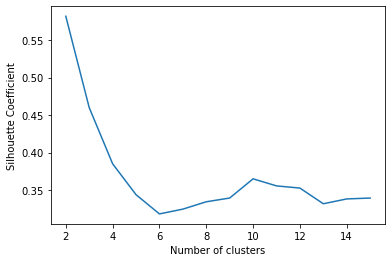

In [23]:
k_range = range(2,16)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(iris_data_scaled)
    scores.append(silhouette_score(iris_data_scaled, km_ss.labels_))

# plot the results
sns.mpl.pyplot.plot(k_range, scores)
sns.mpl.pyplot.xlabel('Number of clusters')
sns.mpl.pyplot.ylabel('Silhouette Coefficient')

## Explore Seed Dataset

I've provided you with the following [seeds dataset](https://archive.ics.uci.edu/ml/datasets/seeds). Each row in the dataset is an individual seed. The individual columns are as follows:
  1. seed area A
  2. seed perimeter P 
  3. compactness $C = 4*\pi*(\frac {A}{P})^2$
  4. length of kernel 
  5. width of kernel 
  6. asymmetry coefficient 
  7. length of kernel groove
  
In the data I've loaded in, I've explicitly removed the seed labeling so that you can explore the data yourself.

Please do the following:
  * Perform clustering using a variety of cluster sizes
  * Calculate the silhouette score for each cluster size and determine an optimal cluster number
  * Visualize the clustering and compute statistics on those clusters. What distinguishes each cluster you've created?

In [31]:
seed_data = pd.read_csv("../data/seeds_dataset.txt",names=["area","perimeter","compactness","length","width","asymmetry","kernel_groove_length","seed_type"])
seed_data.drop("seed_type",axis=1,inplace=True)
seed_data.head()

area  perimeter  compactness  length  width  asymmetry  \
0  15.26      14.84       0.8710   5.763  3.312      2.221   
1  14.88      14.57       0.8811   5.554  3.333      1.018   
2  14.29      14.09       0.9050   5.291  3.337      2.699   
3  13.84      13.94       0.8955   5.324  3.379      2.259   
4  16.14      14.99       0.9034   5.658  3.562      1.355   

   kernel_groove_length  
0                 5.220  
1                 4.956  
2                 4.825  
3                 4.805  
4                 5.175

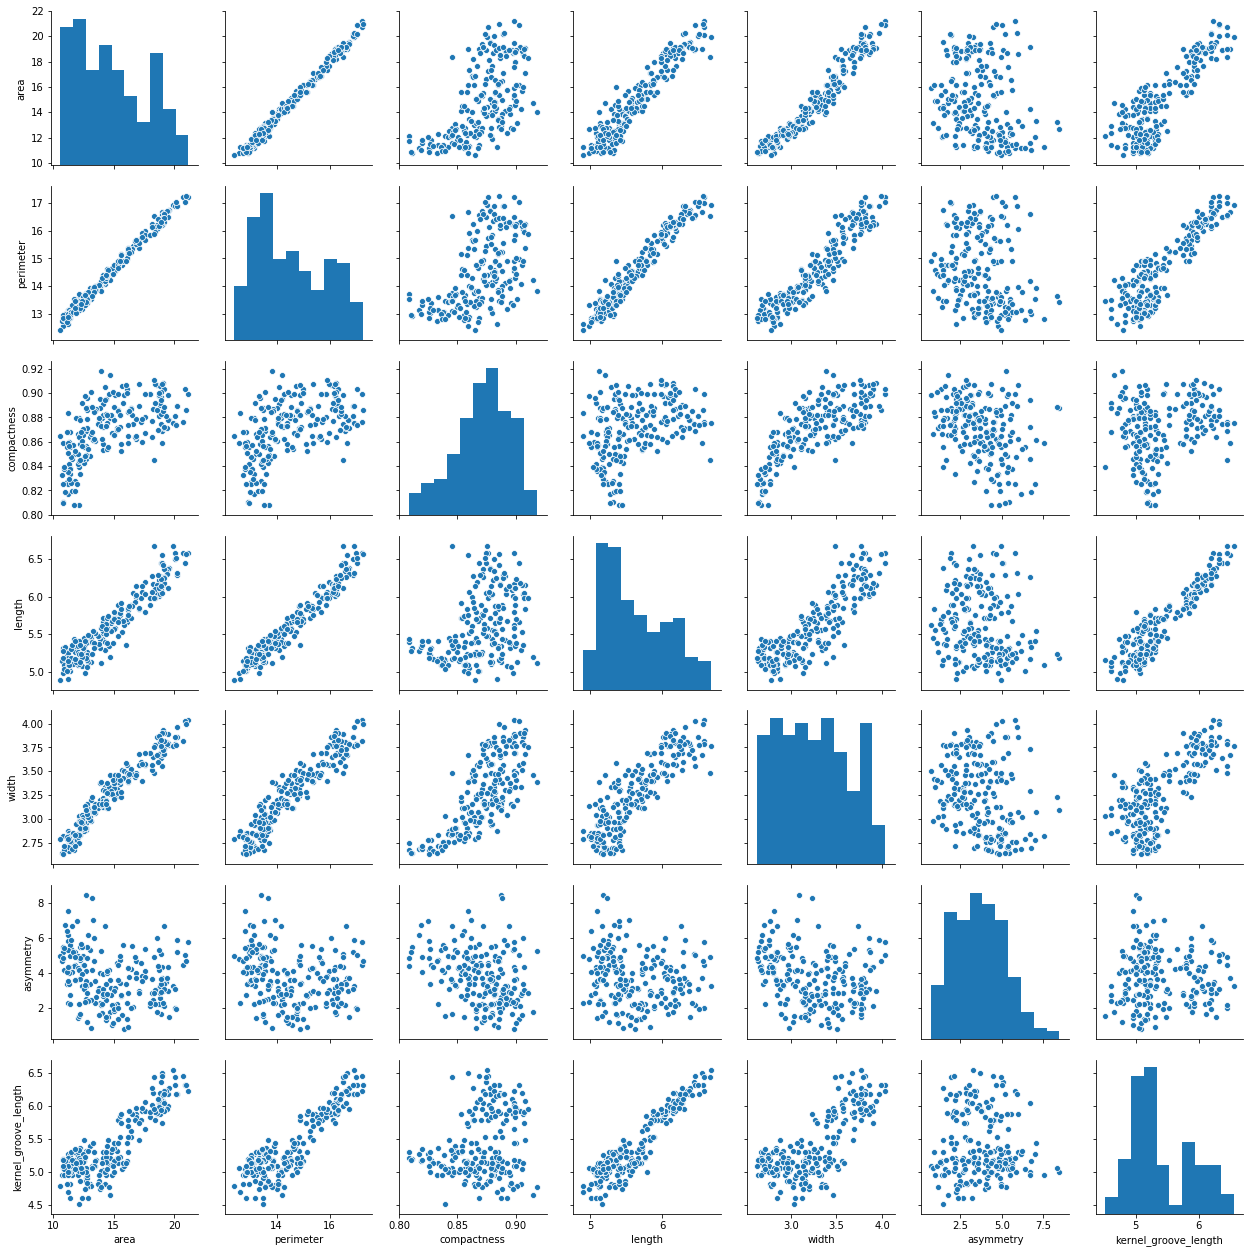

In [32]:
# Explore dataset
sns.pairplot(seed_data)

In [34]:
# Scale data
seed_data_scaled = scaler.fit_transform(seed_data)
seed_data_scaled = pd.DataFrame(seed_data_scaled,columns=seed_data.columns)
print("Before scaling:\n", seed_data.describe())
print("\nAfter scaling:\n", np.round(seed_data_scaled.describe(),2))

Before scaling:
              area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    2.944000   
50%     14.355000   14.320000     0.873450    5.523500    3.237000   
75%     17.305000   15.715000     0.887775    5.979750    3.561750   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

        asymmetry  kernel_groove_length  
count  210.000000            210.000000  
mean     3.700201              5.408071  
std      1.503557              0.491480  
min      0.765100              4.519000  
25%      2.561500              5.045000  
50%      3.599000              5.223000  
75%      4.768750              5.877000  
max      8.45600

In [35]:
seed_km2 = KMeans(n_clusters=2, random_state=1)
seed_km2.fit(seed_data_scaled)
seed_data['kmeans_2_scaled'] = ['cluster_' + str(label) for label in seed_km2.labels_]
print(seed_km2.cluster_centers_)
seed_data.groupby('kmeans_2_scaled').mean()

[[ 1.14065367  1.14788697  0.54376886  1.1287036   1.06661287 -0.14652535
   1.1496198 ]
 [-0.66037844 -0.66456614 -0.31481355 -0.65345998 -0.61751272  0.08483047
  -0.66556936]]


area  perimeter  compactness    length     width  \
kmeans_2_scaled                                                          
cluster_0        18.158571  16.054805     0.883817  6.127429  3.660519   
cluster_1        12.930602  13.693459     0.863577  5.339699  3.025917   

                 asymmetry  kernel_groove_length  
kmeans_2_scaled                                   
cluster_0         3.480417              5.971740  
cluster_1         3.827444              5.081737

C:\Users\gtmas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


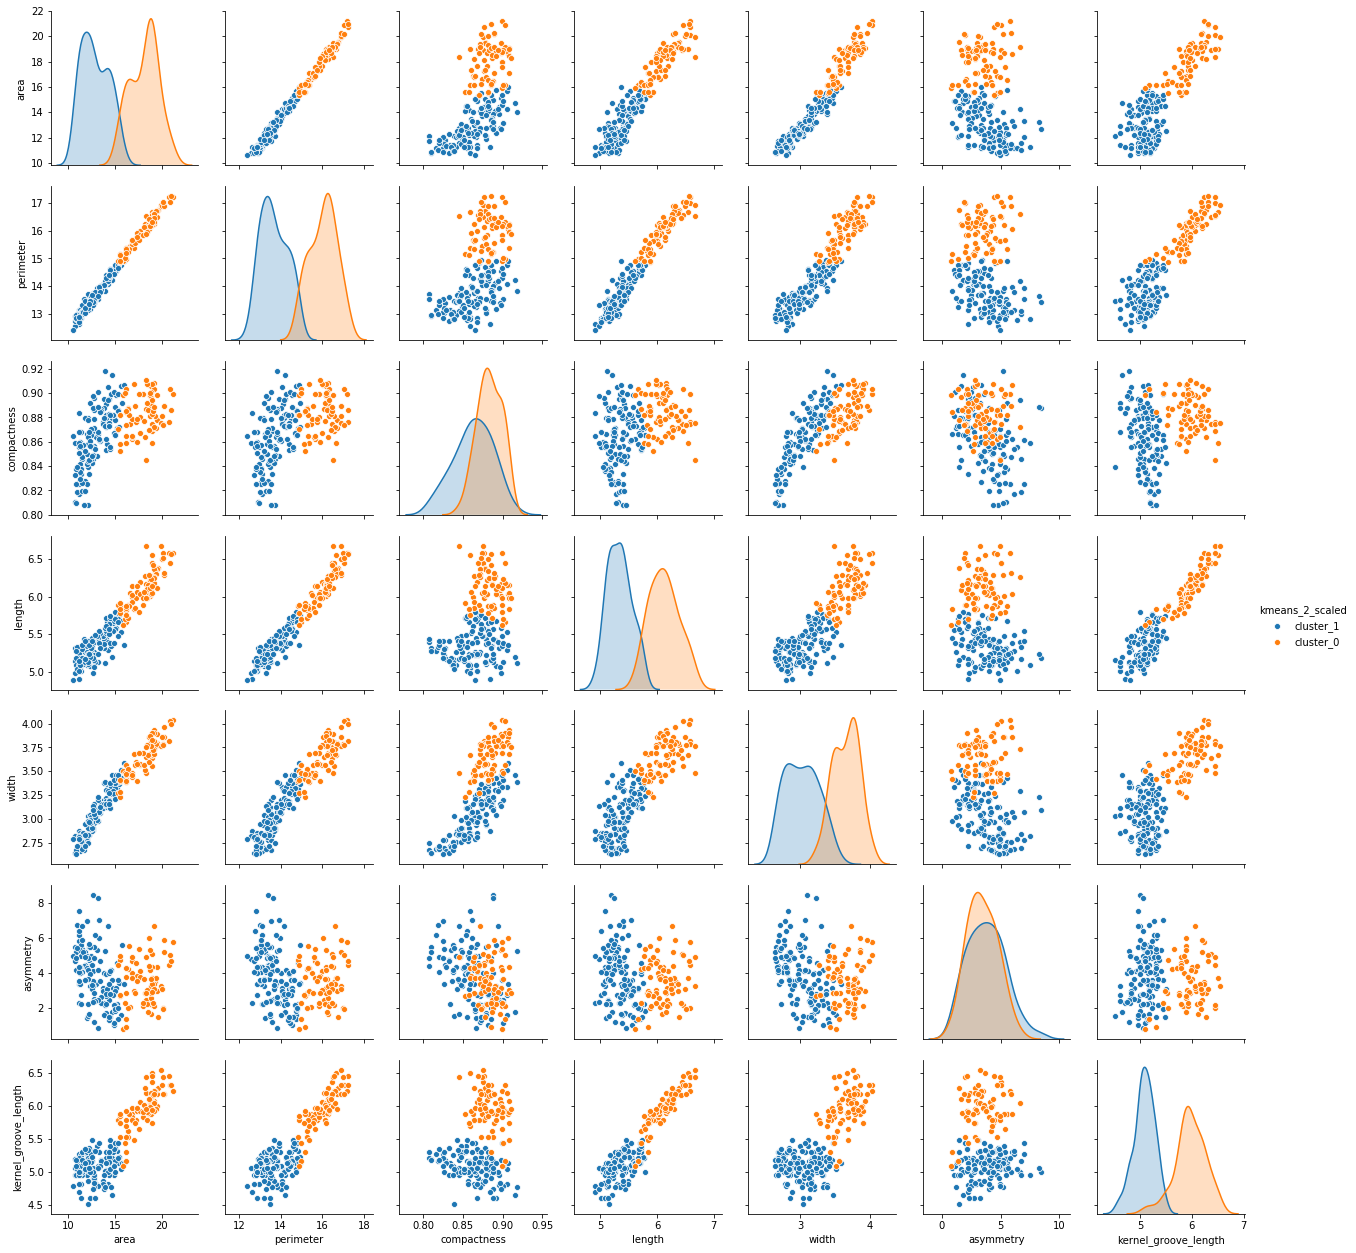

In [36]:
sns.pairplot(seed_data, hue='kmeans_2_scaled')

C:\Users\gtmas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


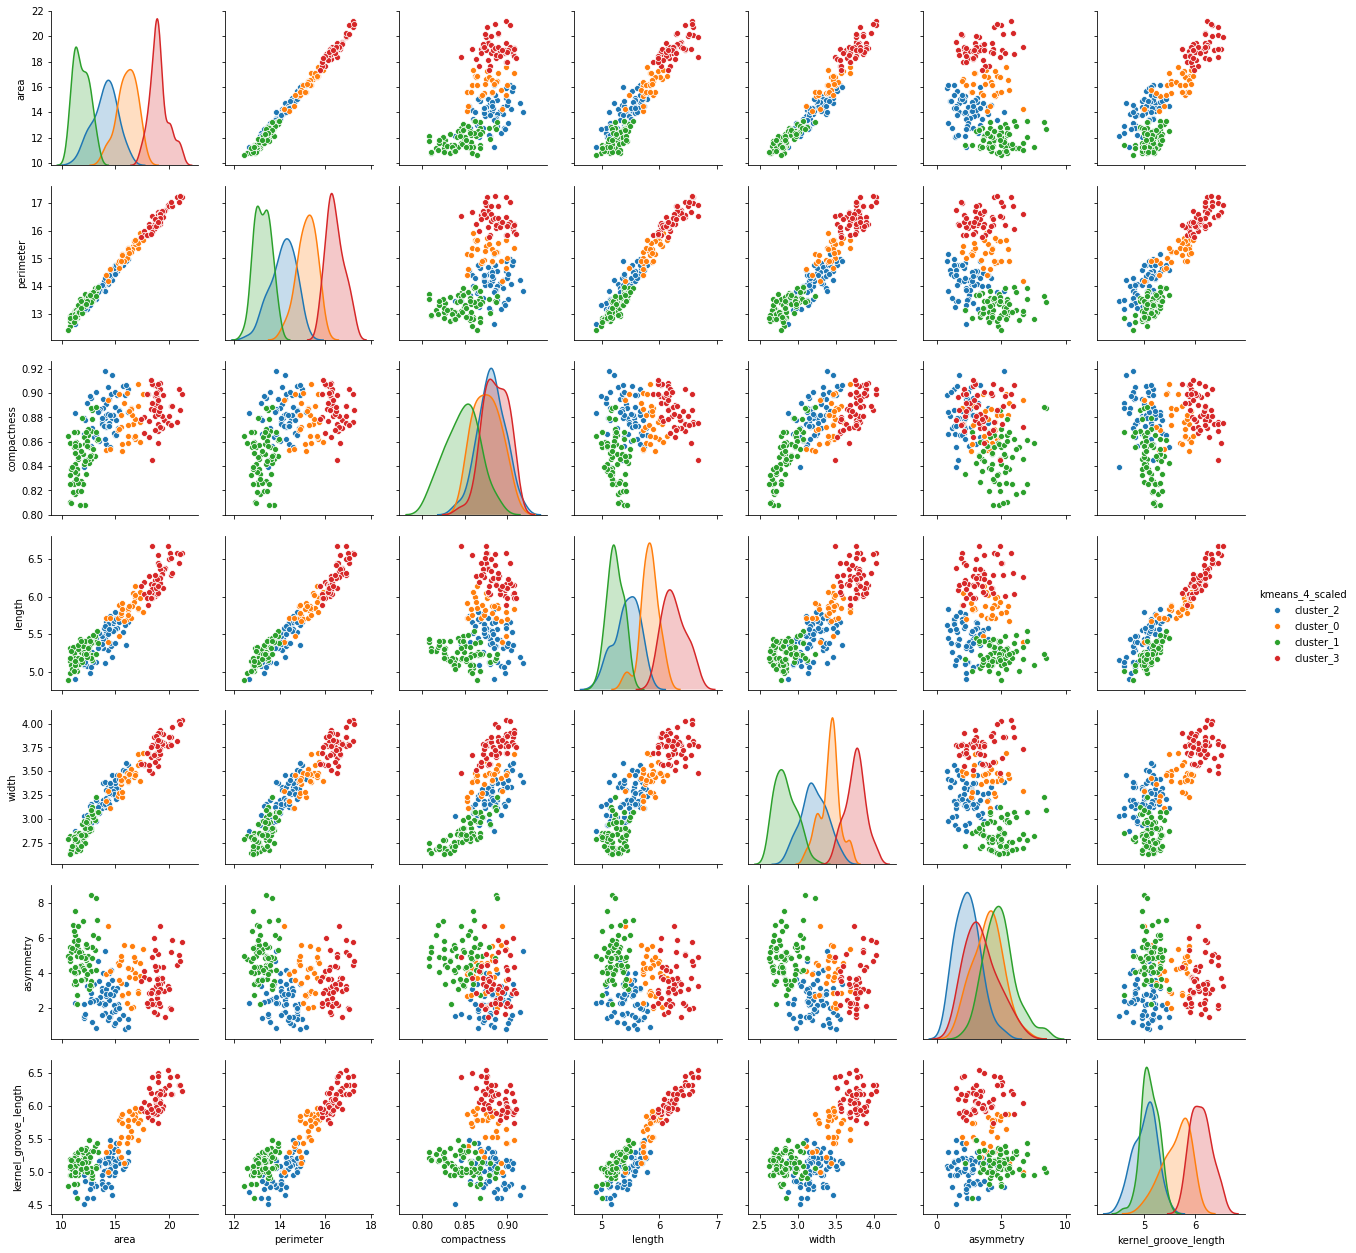

In [38]:
seed_km4 = KMeans(n_clusters=4, random_state=1)
seed_km4.fit(seed_data_scaled)
seed_data['kmeans_4_scaled'] = ['cluster_' + str(label) for label in seed_km4.labels_]
sns.pairplot(seed_data, hue='kmeans_4_scaled')

## Alternative Algorithm: DBSCAN

The second clustering algorithm we are going to investigate is called **DBSCAN** and works a bit differently than K-means.[DBSCAN wiki](https://en.wikipedia.org/wiki/DBSCAN)

**DBSCAN** stands for **Density-based spatial clustering of applications with noise**.

Whereas K-means does not care about the density of data, **DBSCAN** does, under the assumption that **regions of high density in your data should be treated as clusters**.

Furthermore, **DBSCAN does not allow you to specify how many clusters you want.** Instead, you specify 2 parameters:
  1. **$\epsilon$ (epsilon)**: This is the maximum distance between two points to allow them to be neighbors
  2. **min_samples**: The number of neighbors a given point is allowed to have to be able to be part of a cluster

Any points that don't satisfy the criteria of being close enough to other points are labeled outliers and all fall into a single "cluster" (their cluster label by default is -1).

### When should I use euclidean distance as a distance metric?

Many different kinds of distance metrics exist, but euclidean distance is the most commonly used (and misused) distance metric.

It is useful when:
* All of the features (columns) in your data are numeric
* There are not many feature dimensions (<100)

It is not useful when:
* Columns in your data are composed of either strings or categories, or your columns have both numeric and categorical features.
* You have 1000s of features in your dataset (because of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality))

We will talk about other distance metrics and when they should be used next week.

## Takeaways - K-means vs DBSCAN

**K-means**:
  * is a good off-the-shelf clustering algorithm when youre dealing with numerical data and have some idea of the number of clusters you are looking for in your dataset
  * requires feature scaling
  * requires specifiying the number of clusters
  * can only use the euclidean distance as a distance metric
  * is non-deterministic (will generate different cluster labelings depending on initial conditions)

**DBSCAN**:
  * is a good clustering algorithm when you are attempting to find dense and non-dense regions in your feature space but dont know the number of clusters you're looking for.
  * requires feature scaling
  * requires specifying a distance metric (euclidean is default)
  * requires specifying a minimum distance between points, $\epsilon$
  * requires specifying a minimum number of points to be called a "cluster" (min_samples), minimum is 2
  * is non-deterministic (when points are on the border between two clusters, can be assigned to either one, depending on order in which un-visited points are visited).   